# Exploratory analysis of nodule images

## Import modules

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from pathlib import Path

from lung_cancer_detection.data.nodule import ClassificationDataModule
from lung_cancer_detection.utils import preview_dataset, load_json

## Setup data module

In [5]:
rp = Path("/Volumes/LaCie/data/lung-cancer-detection/lidc-idri/").absolute()
dp = rp/"processed"
cp = (Path()/"../data/cache/").absolute()
sp = rp/"splits"
cp.mkdir(exist_ok=True)
print(dp.exists(), cp.exists(), sp.exists())

True True True


In [6]:
splits = [load_json(f) for f in sp.iterdir()]

In [12]:
dm = ClassificationDataModule(dp, 
                              cp, 
                              splits, 
                              min_anns=1, 
                              exclude_labels=[], 
                              label_mapping=([1,2,3,4,5], [0,0,1,1,1]))

In [13]:
dm.setup()

## Preview training set

### Preview benign nodules

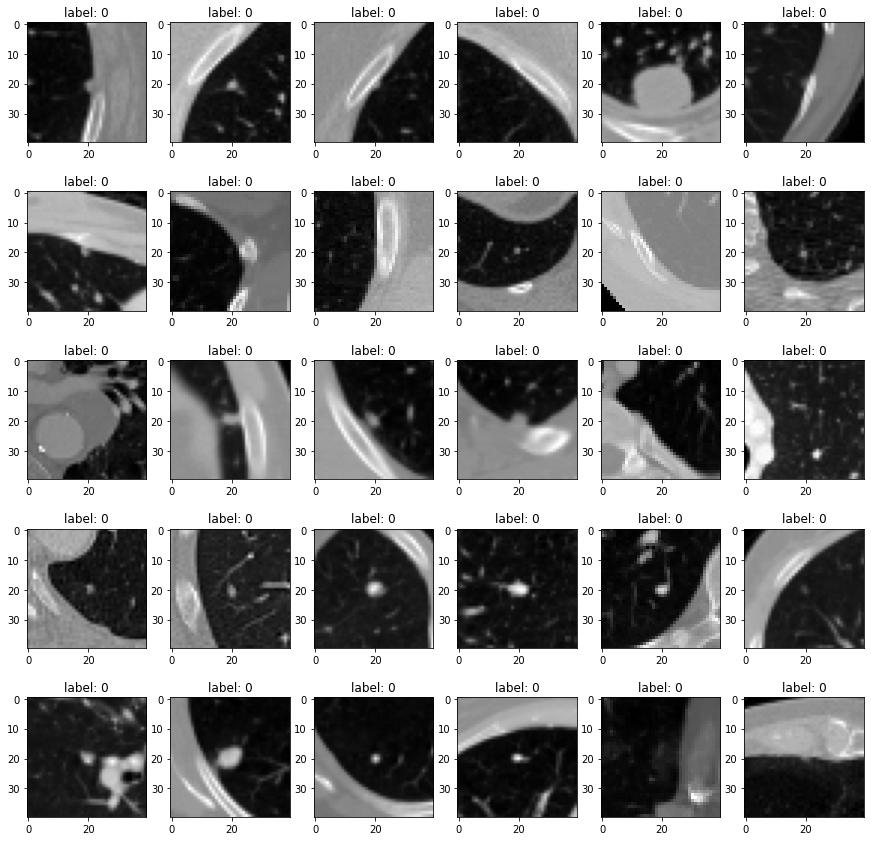

In [14]:
preview_dataset(dm.query_by_label(n=30, labels=[0]))

### Preview malignant nodules

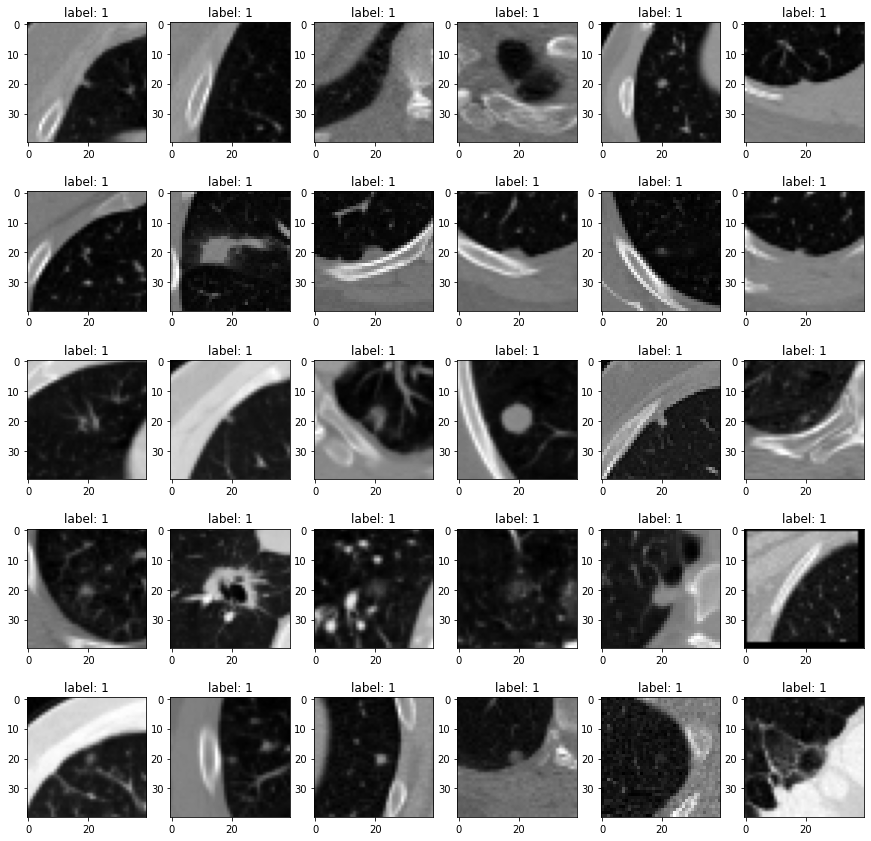

In [16]:
preview_dataset(dm.query_by_label(n=30, labels=[1]))

## Preview validation set

### Preview benign nodules

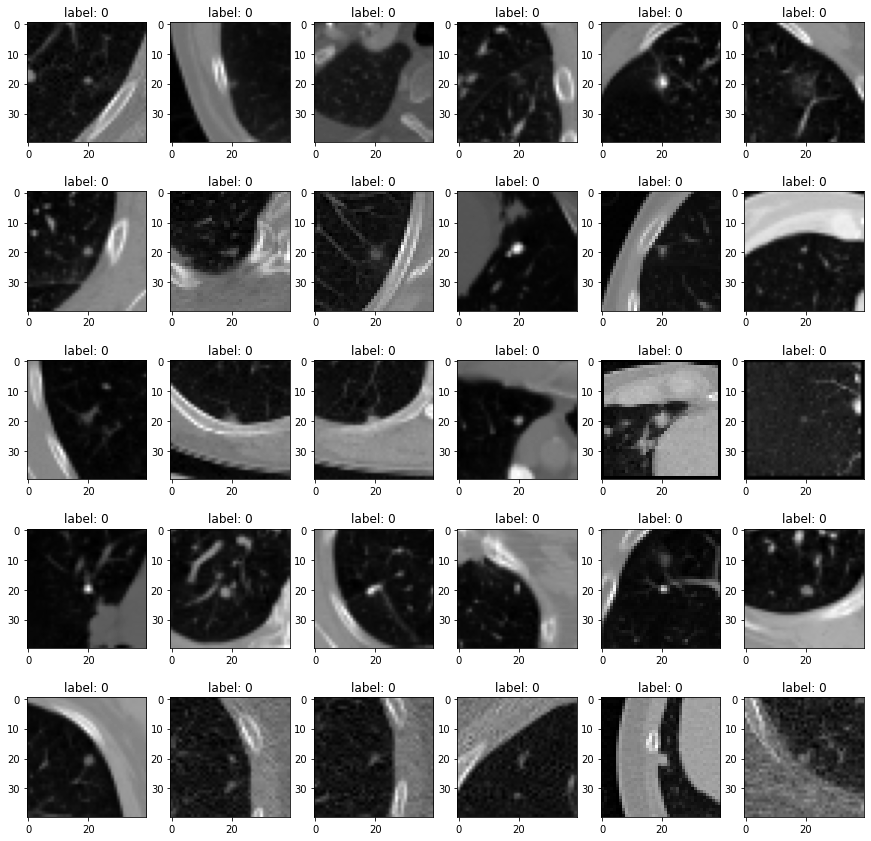

In [17]:
preview_dataset(dm.query_by_label(split="val", n=30, labels=[0]))

### Preview malignant nodules

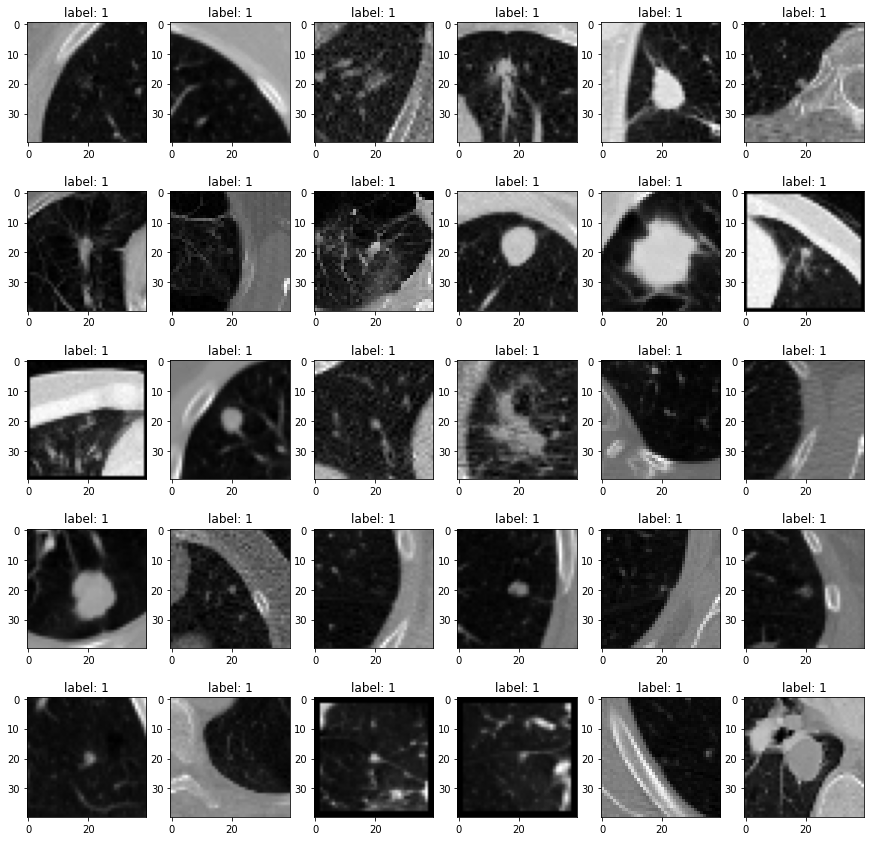

In [18]:
preview_dataset(dm.query_by_label(split="val", n=30, labels=[1]))

## Test data augmentation

### Original nodule volumes

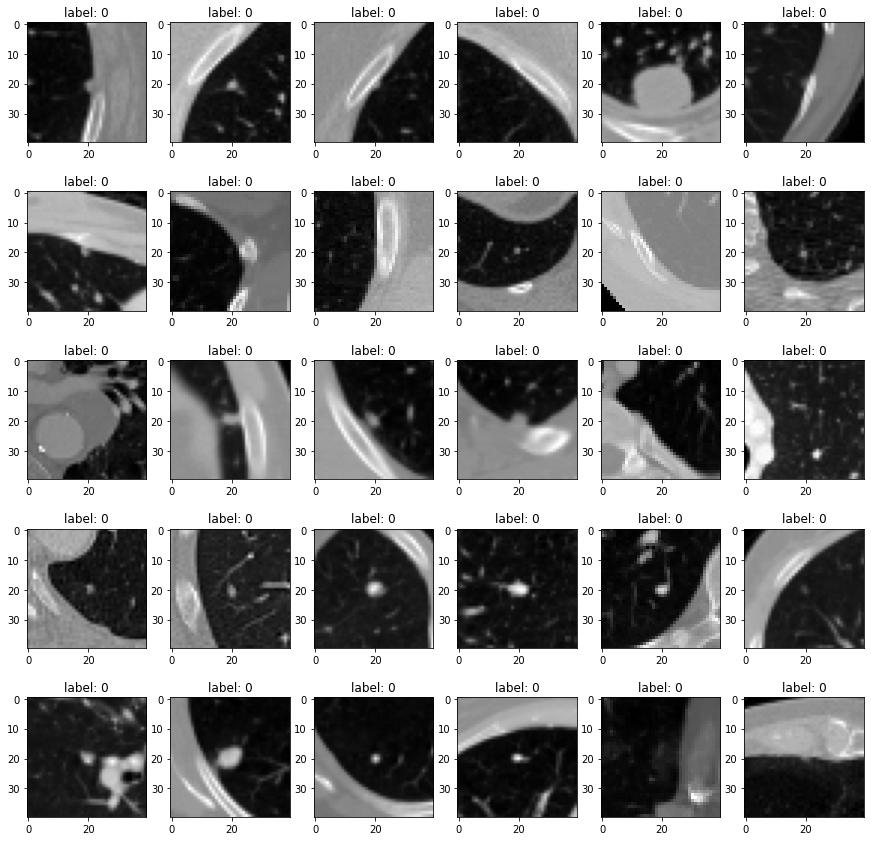

In [19]:
preview_dataset(dm.query_by_label(n=30, labels=[0]))

### Augmented nodule volumes

In [20]:
aug_dm = ClassificationDataModule(dp, 
                              cp, 
                              splits, 
                              min_anns=1,
                              aug_prob=1.0,
                              exclude_labels=[], 
                              label_mapping=([1,2,3,4,5], [0,0,1,1,1]))
aug_dm.setup()

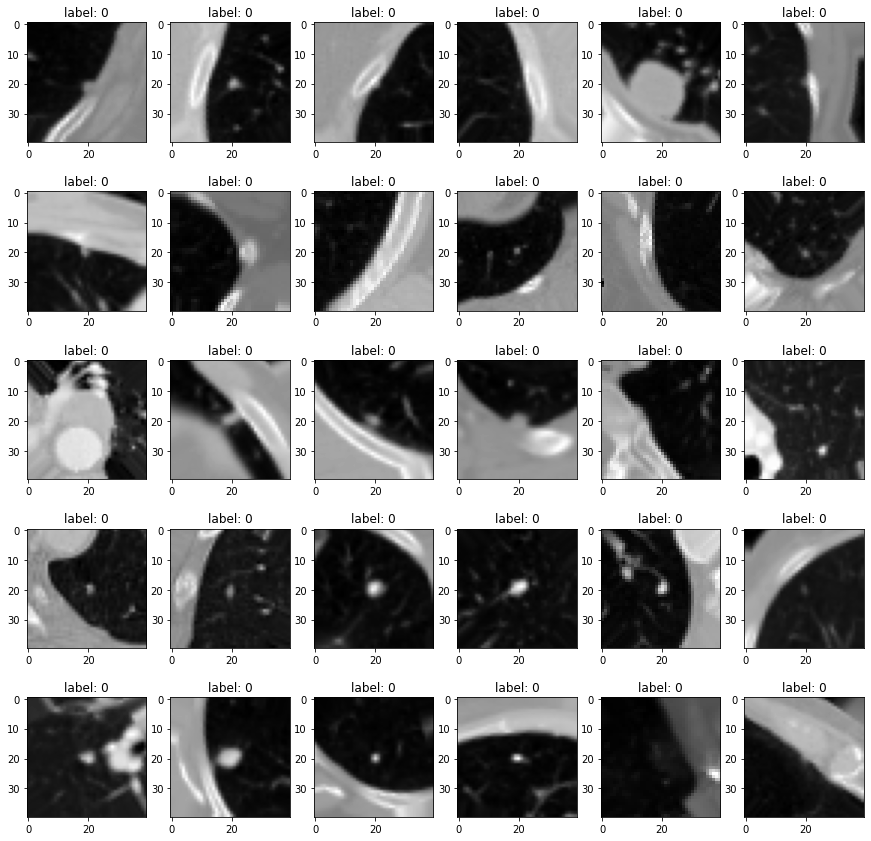

In [21]:
preview_dataset(aug_dm.query_by_label(n=30, labels=[0]))